### Import and Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configuration for prettier plots
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

### Data Loading

In [10]:
try:
    # Assuming the file is in the data/raw directory as per project structure
    df = pd.read_csv('../data/raw/sensor.csv', index_col=False)
    print("✅ Data Loaded Successfully")
    print(f"Dimensions: {df.shape}")
except FileNotFoundError:
    print("❌ Error: 'sensor.csv' not found. Please ensure it is in 'data/raw/'")

# Check the first few rows
df.head()

✅ Data Loaded Successfully
Dimensions: (220320, 55)


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


### Intial Cleaning

In [11]:
# dropping unnamed column and setting timestamp as index
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')

# dropping columns with more than 50% missing values
missing_ratio = df.isnull().mean()
drop_cols = missing_ratio[missing_ratio > 0.5].index.tolist()
print(f"🗑️ Dropping columns with >50% missing values: {drop_cols}")
df.drop(columns=drop_cols, inplace=True)

🗑️ Dropping columns with >50% missing values: ['sensor_15']


### Advance Cleaning

In [12]:
# Calculate standard deviation for numerical columns only
stats = df.select_dtypes(include=[np.number]).std()
flat_sensors = stats[stats == 0].index.tolist()

print(f"Ghost Sensors Detected (Flatline): {flat_sensors}")
df.drop(columns=flat_sensors, inplace=True)

# Fill remaining gaps with Forward Fill (Sensors lag, they don't produce Nulls naturally)
df.fillna(method='ffill', inplace=True)
# Fill initial NaNs with backfill just in case
# df.fillna(method='bfill', inplace=True)

print(f"Cleaned Data Dimensions: {df.shape}")

Ghost Sensors Detected (Flatline): []
Cleaned Data Dimensions: (220320, 52)


/tmp/ipykernel_288439/1611485321.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


### Visualization

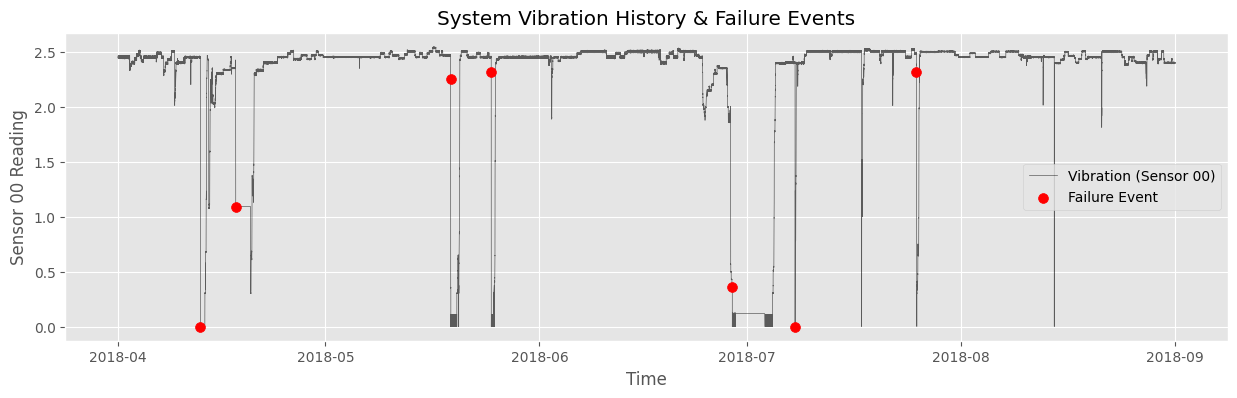

In [13]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['sensor_00'], label='Vibration (Sensor 00)', color='black', alpha=0.6, linewidth=0.5)

# Highlight failures
broken_rows = df[df['machine_status'] == 'BROKEN']
plt.scatter(broken_rows.index, broken_rows['sensor_00'], color='red', label='Failure Event', s=50, zorder=5)

plt.title("System Vibration History & Failure Events")
plt.xlabel("Time")
plt.ylabel("Sensor 00 Reading")
plt.legend()
plt.show()

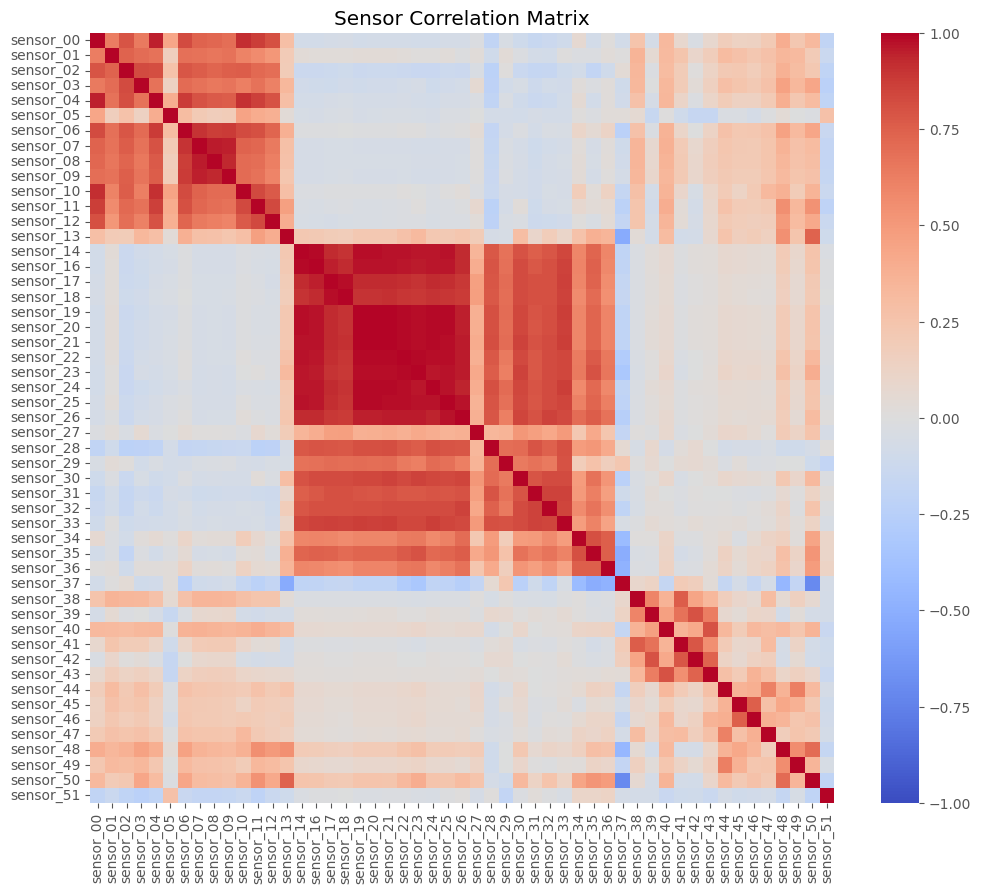

In [14]:
# Downsample for speed (every 100th row)
df_sample = df.select_dtypes(include=[np.number]).iloc[::100, :]
corr = df_sample.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Sensor Correlation Matrix")
plt.show()

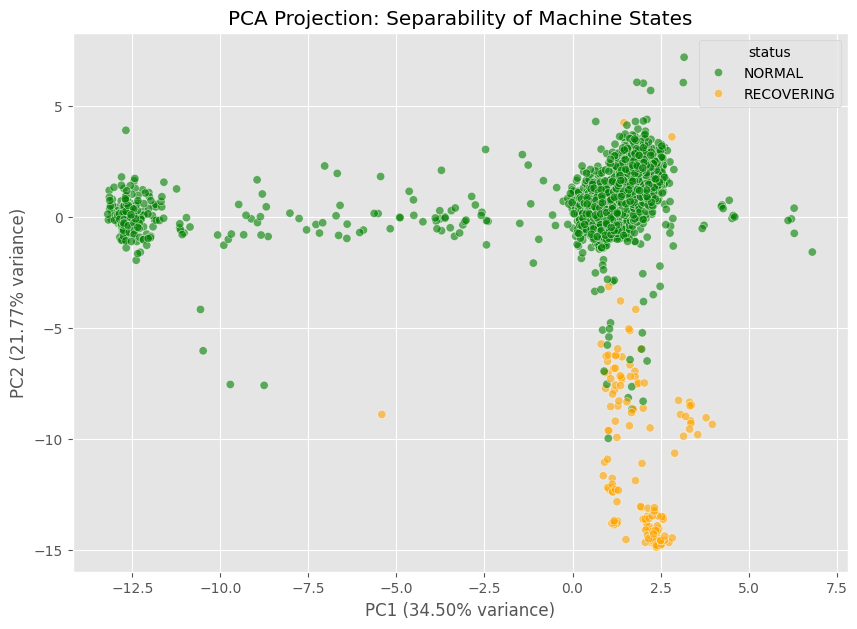

In [15]:
# 1. Scale the data (Mandatory for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample) # Using the downsampled data

# 2. Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 3. Create a plotting DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['status'] = df['machine_status'].iloc[::100].values

# 4. Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='status', data=pca_df, palette={'NORMAL': 'green', 'BROKEN': 'red', 'RECOVERING': 'orange'}, alpha=0.6)
plt.title("PCA Projection: Separability of Machine States")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
plt.show()

### Checking Pre-Failure data

🔍 Zooming in on failure at: 2018-04-12 21:55:00


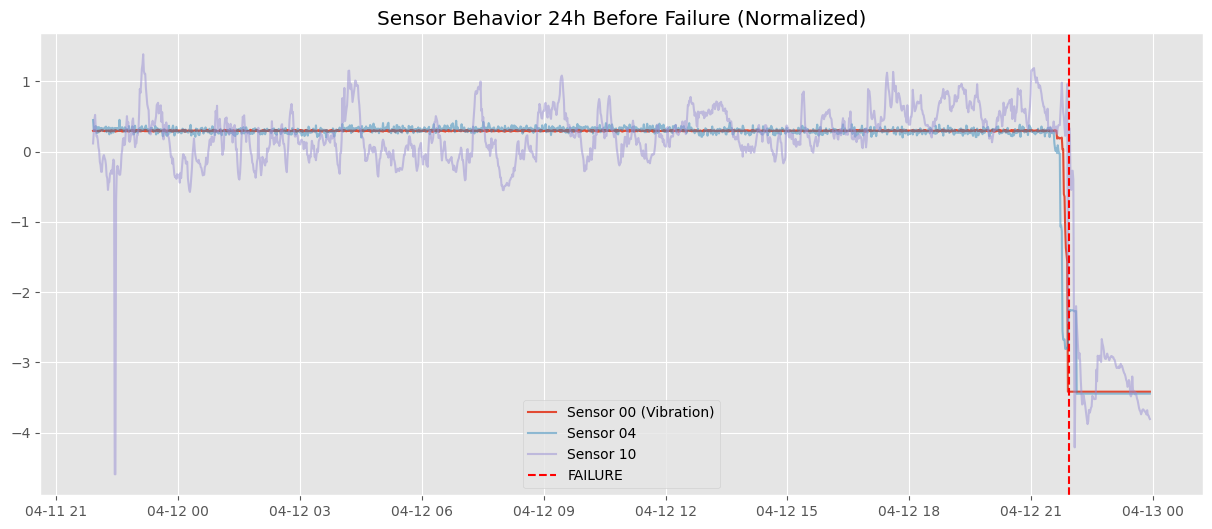

In [16]:
    first_failure = df[df['machine_status'] == 'BROKEN'].index[0]
    print(f"Zooming in on failure at: {first_failure}")

    # Define window: 24 hours before to 1 hour after
    start_window = first_failure - pd.Timedelta(hours=24)
    end_window = first_failure + pd.Timedelta(hours=2)

    subset = df.loc[start_window:end_window]

    # Plotting a few key sensors
    plt.figure(figsize=(15, 6))
    
    # Normalize subset for comparison
    subset_norm = (subset.select_dtypes(include=[np.number]) - subset.select_dtypes(include=[np.number]).mean()) / subset.select_dtypes(include=[np.number]).std()

    plt.plot(subset.index, subset_norm['sensor_00'], label='Sensor 00 (Vibration)')
    plt.plot(subset.index, subset_norm['sensor_04'], label='Sensor 04', alpha=0.5)
    plt.plot(subset.index, subset_norm['sensor_10'], label='Sensor 10', alpha=0.5)

    plt.axvline(x=first_failure, color='red', linestyle='--', label='FAILURE')
    plt.title("Sensor Behavior 24h Before Failure (Normalized)")
    plt.legend()
    plt.show()